# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
# Set Seaborn style
sns.set(style="whitegrid")

# Step 2: Load cleaned dataset
df = pd.read_csv("Cleaned_AviationData.csv")

# Step 3: Inspect the dataset
print("Cleaned data loaded.")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

Cleaned data loaded.

First 5 rows:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Estimated.Total.Onboard,Injury.Rate,Total.Destruction
0,20001214X42095,Accident,SEA83LA036,1983-01-01,"NEWPORT, OR",United States,ONP,NEWPORT MUNICIPAL,Non-Fatal,substantial,...,0.0,1.0,3.0,VMC,APPROACH,Probable Cause,NaN,4.0,0.0,0
1,20001214X42067,Accident,MKC83LA056,1983-01-01,"WOODBINE, IA",United States,3YR,MUNICIPAL,Non-Fatal,substantial,...,0.0,0.0,2.0,VMC,LANDING,Probable Cause,NaN,2.0,0.0,0
2,20001214X42063,Accident,MKC83LA050,1983-01-01,"MARYVILLE, MO",United States,78Y,RANKIN,Non-Fatal,substantial,...,0.0,0.0,1.0,VMC,TAKEOFF,Probable Cause,NaN,1.0,0.0,0
3,20001214X42018,Accident,LAX83FUG11,1983-01-01,"UPLAND, CA",United States,CCB,CABLE,Non-Fatal,substantial,...,0.0,2.0,0.0,VMC,APPROACH,Probable Cause,NaN,2.0,0.0,0
4,20001214X41951,Accident,CHI83LA074,1983-01-01,"SPRINGBROOK, WI",United States,NaN,SPRINGBROOK,Non-Fatal,substantial,...,0.0,0.0,2.0,VMC,LANDING,Probable Cause,NaN,2.0,0.0,0



Dataset shape: (52841, 28)

Column names: ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Estimated.Total.Onboard', 'Injury.Rate', 'Total.Destruction']


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [ ]:
injury_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

df[injury_cols] = df[injury_cols].fillna(0)

df['Estimated.Total.Passengers'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Uninjured']
)

df['Aircraft.Size'] = df['Estimated.Total.Passengers'].apply(
    lambda x: 'Small' if x < 20 else 'Large'
)

df[['Make', 'Model', 'Estimated.Total.Passengers', 'Aircraft.Size']].head()

df['Aircraft.Size'] = df['Estimated.Total.Passengers'].apply(lambda x: 'Small' if x < 20 else 'Large')

summary = (
    df.groupby(['Make', 'Model', 'Aircraft.Size'])
    .agg(
        Total_Accidents=('Event.Id', 'count'),
        Avg_Injury_Rate=('Injury.Rate', 'mean'),
        Destruction_Rate=('Total.Destruction', 'mean')
    )
    .reset_index()
)

summary_filtered = summary[summary['Total_Accidents'] >= 30]

small_aircraft = summary_filtered[summary_filtered['Aircraft.Size'] == 'Small'].sort_values(by='Avg_Injury_Rate')
large_aircraft = summary_filtered[summary_filtered['Aircraft.Size'] == 'Large'].sort_values(by='Avg_Injury_Rate')

import pandas as pd
from IPython.display import display
print(" Top 10 Small Aircraft Models by Safety (Injury Rate):")
display(small_aircraft.head(10))

print("\n Top 10 Large Aircraft Models by Safety (Injury Rate):")
display(large_aircraft.head(10))

 Top 10 Small Aircraft Models by Safety (Injury Rate):


,Make,Model,Aircraft.Size,Total_Accidents,Avg_Injury_Rate,Destruction_Rate
2605,ENSTROM,F-28A,Small,36,0.041667,0.138889
2912,GRUMMAN-SCHWEIZER,G-164A,Small,38,0.043860,0.157895
1775,CESSNA,185F,Small,74,0.060811,0.081081
772,BEECH,C-23,Small,30,0.066667,0.100000
1977,CESSNA,A185E,Small,46,0.072464,0.021739
1975,CESSNA,A185,Small,57,0.081871,0.000000
659,BEECH,B19,Small,42,0.087302,0.119048
1709,CESSNA,180A,Small,44,0.090909,0.045455
3845,PIPER,PA-20,Small,101,0.094059,0.069307
76,AERO COMMANDER,S2R,Small,60,0.100000,0.200000



 Top 10 Large Aircraft Models by Safety (Injury Rate):


,Make,Model,Aircraft.Size,Total_Accidents,Avg_Injury_Rate,Destruction_Rate
1321,BOEING,737,Large,43,0.08545,0.069767


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

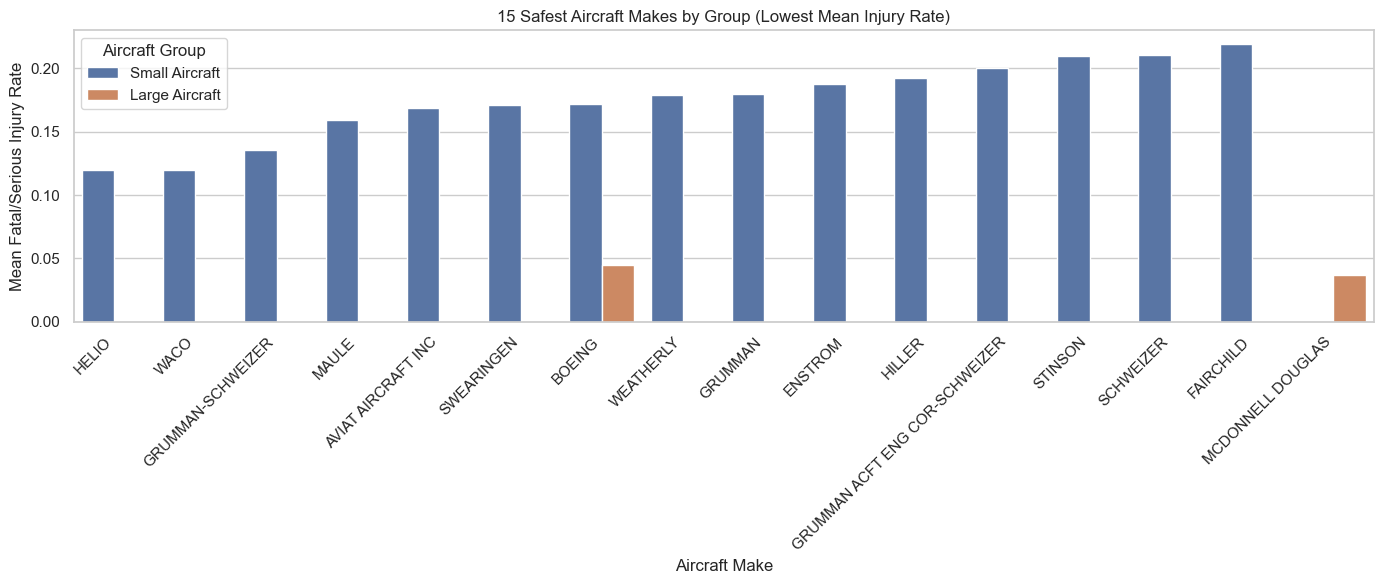

In [7]:
if 'Estimated.Total.Passengers' not in df.columns:
    df['Estimated.Total.Passengers'] = (
        df['Total.Fatal.Injuries'].fillna(0) +
        df['Total.Serious.Injuries'].fillna(0) +
        df['Total.Minor.Injuries'].fillna(0) +
        df['Total.Uninjured'].fillna(0)
    )

# Split into small and large aircraft
small_aircraft = df[df['Estimated.Total.Passengers'] <= 20]
large_aircraft = df[df['Estimated.Total.Passengers'] > 20]

# Function to get safest makes
def get_safest_makes(data, group_name):
    make_stats = data.groupby('Make').agg(
        mean_injury_rate=('Injury.Rate', 'mean'),
        count=('Make', 'count')
    ).reset_index()
    filtered = make_stats[make_stats['count'] >= 50]
    safest = filtered.sort_values('mean_injury_rate').head(15)
    safest['Group'] = group_name
    return safest

# Get data
safest_small = get_safest_makes(small_aircraft, 'Small Aircraft')
safest_large = get_safest_makes(large_aircraft, 'Large Aircraft')
safest_combined = pd.concat([safest_small, safest_large])

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=safest_combined, x='Make', y='mean_injury_rate', hue='Group')
plt.title('15 Safest Aircraft Makes by Group (Lowest Mean Injury Rate)')
plt.xlabel('Aircraft Make')
plt.ylabel('Mean Fatal/Serious Injury Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Group')
plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

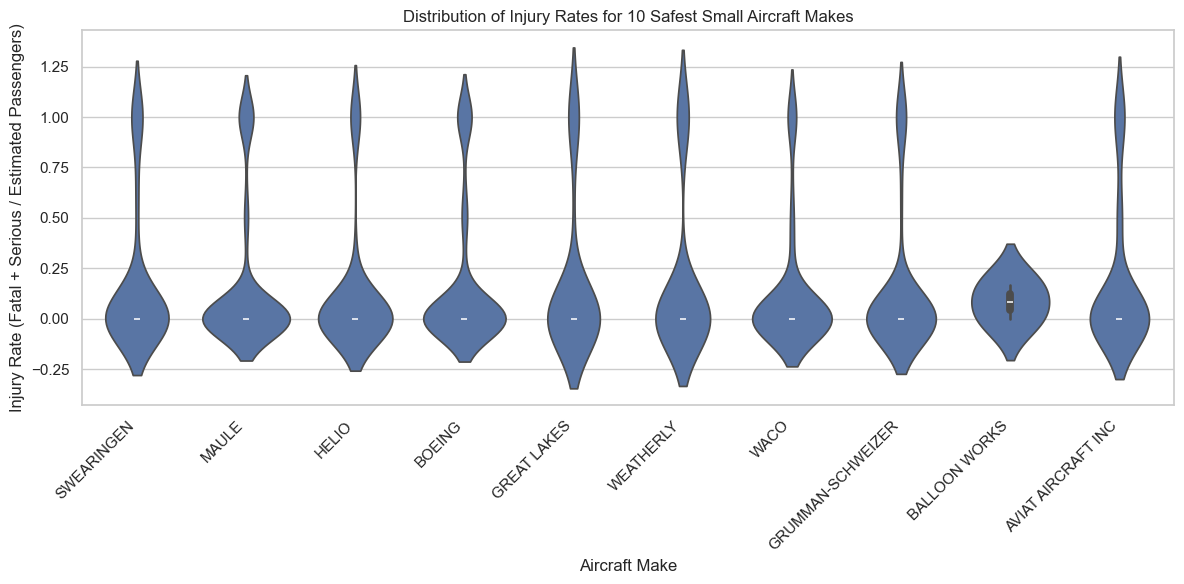

In [8]:
df = pd.read_csv('Cleaned_AviationData.csv')

if 'Estimated.Total.Passengers' not in df.columns:
    df['Estimated.Total.Passengers'] = (
        df['Total.Fatal.Injuries'].fillna(0) +
        df['Total.Serious.Injuries'].fillna(0) +
        df['Total.Minor.Injuries'].fillna(0) +
        df['Total.Uninjured'].fillna(0)
    )

small_df = df[df['Estimated.Total.Passengers'] <= 20]

small_df = small_df[small_df['Estimated.Total.Passengers'] > 0]

mean_rates = (
    small_df.groupby('Make')['Injury.Rate']
    .mean()
    .sort_values()
    .head(10)
    .index
)

safest_small_makes = small_df[small_df['Make'].isin(mean_rates)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=safest_small_makes, x='Make', y='Injury.Rate', inner='box')
plt.title('Distribution of Injury Rates for 10 Safest Small Aircraft Makes')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Injury Rate (Fatal + Serious / Estimated Passengers)')
plt.xlabel('Aircraft Make')
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

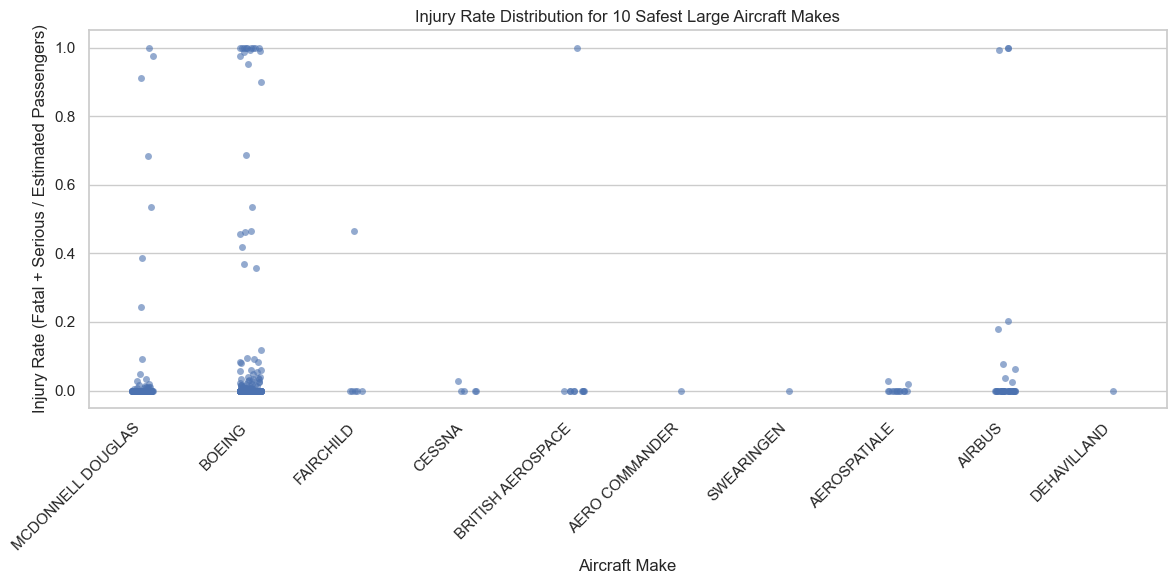

In [14]:
df = pd.read_csv('Cleaned_AviationData.csv')

if 'Estimated.Total.Passengers' not in df.columns:
    df['Estimated.Total.Passengers'] = (
        df['Total.Fatal.Injuries'].fillna(0) +
        df['Total.Serious.Injuries'].fillna(0) +
        df['Total.Minor.Injuries'].fillna(0) +
        df['Total.Uninjured'].fillna(0)
    )

large_df = df[df['Estimated.Total.Passengers'] > 20]
large_df = large_df[large_df['Estimated.Total.Passengers'] > 0]

if 'Injury.Rate' not in large_df.columns:
    large_df['Injury.Rate'] = (
        (large_df['Total.Fatal.Injuries'].fillna(0) + 
         large_df['Total.Serious.Injuries'].fillna(0)) /
        large_df['Estimated.Total.Passengers']
    )

top_large_makes = (
    large_df.groupby('Make')['Injury.Rate']
    .mean()
    .sort_values()
    .head(10)
    .index
)

safest_large_df = large_df[large_df['Make'].isin(top_large_makes)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=safest_large_df, x='Make', y='Injury.Rate', jitter=True, alpha=0.6)
plt.title('Injury Rate Distribution for 10 Safest Large Aircraft Makes')
plt.ylabel('Injury Rate (Fatal + Serious / Estimated Passengers)')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [16]:
df = df[df['Estimated.Total.Passengers'] > 0]

if 'Destroyed' not in df.columns:
    df['Destroyed'] = df['Aircraft.damage'].fillna('').str.upper().str.contains('DESTROYED').astype(int)

small_aircraft = df[df['Estimated.Total.Passengers'] <= 20]
large_aircraft = df[df['Estimated.Total.Passengers'] > 20]

small_destruction = (
    small_aircraft.groupby('Make')
    .agg(Destruction_Rate=('Destroyed', 'mean'), Num_Accidents=('Destroyed', 'count'))
    .query("Num_Accidents >= 50")
    .sort_values(by='Destruction_Rate')
    .head(15)
)

large_destruction = (
    large_aircraft.groupby('Make')
    .agg(Destruction_Rate=('Destroyed', 'mean'), Num_Accidents=('Destroyed', 'count'))
    .query("Num_Accidents >= 50")
    .sort_values(by='Destruction_Rate')
    .head(15)
)

print("Lowest 15 Destruction Rates for Small Aircraft Makes:")
print(small_destruction)

print("\nLowest 15 Destruction Rates for Large Aircraft Makes:")
print(large_destruction)

Lowest 15 Destruction Rates for Small Aircraft Makes:
                                Destruction_Rate  Num_Accidents
Make                                                           
GRUMMAN ACFT ENG COR-SCHWEIZER          0.000000             55
AVIAT AIRCRAFT INC                      0.040541             74
DEHAVILLAND                             0.044944             89
DIAMOND AIRCRAFT IND INC                0.055556             72
ERCOUPE                                 0.056604             53
ROBINSON HELICOPTER                     0.062780            223
AVIAT                                   0.072464             69
WACO                                    0.081818            110
ROBINSON HELICOPTER COMPANY             0.087912            182
MAULE                                   0.100671            447
AIR TRACTOR INC                         0.107843            204
BOEING                                  0.110024            409
LUSCOMBE                                0.120253  

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
"Based on the above data, you can see the Grumman, Aviat, and Dehavilland have the lowest destruction rate for Small Aircrat makes. For large aircrafts, Boeing had more accidents but with less destruction rate compared to McDonnell. However, more injuries were reported with Boeing compared to McDonnell. Based on the above information, the best make depends on if you prefer less serious injuries with more aircraft destruction (Mcdonnell), or more serious injuries with less aircraft destruction (Boeing)"

'Based on the above data, you can see the Grumman, Aviat, and Dehavilland have the lowest destruction rate'

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

C:\Users\JoeJu\AppData\Local\Temp\ipykernel_27072\2906433128.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_grouped, x="Injury.Rate", y="Make", palette="viridis")


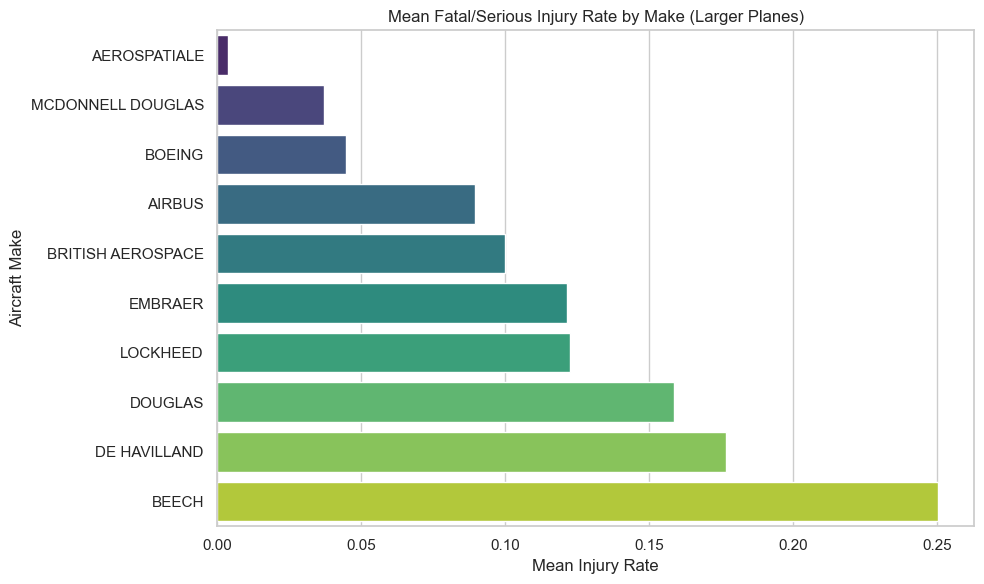

C:\Users\JoeJu\AppData\Local\Temp\ipykernel_27072\2906433128.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_large_filtered, x="Injury.Rate", y="Make", inner="quartile", palette="viridis")


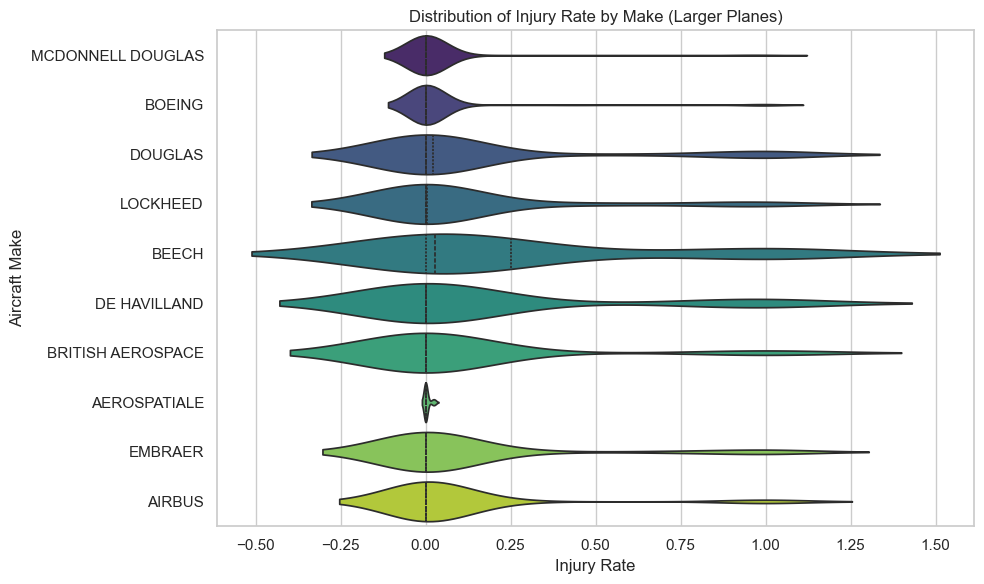

In [ ]:
if 'Estimated.Total.Passengers' not in df.columns:
    df['Estimated.Total.Passengers'] = (
        df['Total.Fatal.Injuries'].fillna(0) +
        df['Total.Serious.Injuries'].fillna(0) +
        df['Total.Minor.Injuries'].fillna(0) +
        df['Total.Uninjured'].fillna(0)
    )

if 'Injury.Rate' not in df.columns:
    df['Injury.Rate'] = (
        (df['Total.Fatal.Injuries'].fillna(0) + df['Total.Serious.Injuries'].fillna(0)) /
        df['Estimated.Total.Passengers']
    ).fillna(0)


df_large = df[df['Estimated.Total.Passengers'] > 20]

df_large_filtered = df_large.groupby("Make").filter(lambda x: len(x) >= 10)

grouped_large = (
    df_large_filtered.groupby("Make")["Injury.Rate"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

sorted_grouped = grouped_large.sort_values(by="Injury.Rate")
sns.barplot(data=sorted_grouped, x="Injury.Rate", y="Make", palette="viridis")
plt.title("Mean Fatal/Serious Injury Rate by Make (Larger Planes)")
plt.xlabel("Mean Injury Rate")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_large_filtered, x="Injury.Rate", y="Make", inner="quartile", palette="viridis")
plt.title("Distribution of Injury Rate by Make (Larger Planes)")
plt.xlabel("Injury Rate")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

C:\Users\JoeJu\AppData\Local\Temp\ipykernel_27072\2641645187.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\JoeJu\AppData\Local\Temp\ipykernel_27072\2641645187.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


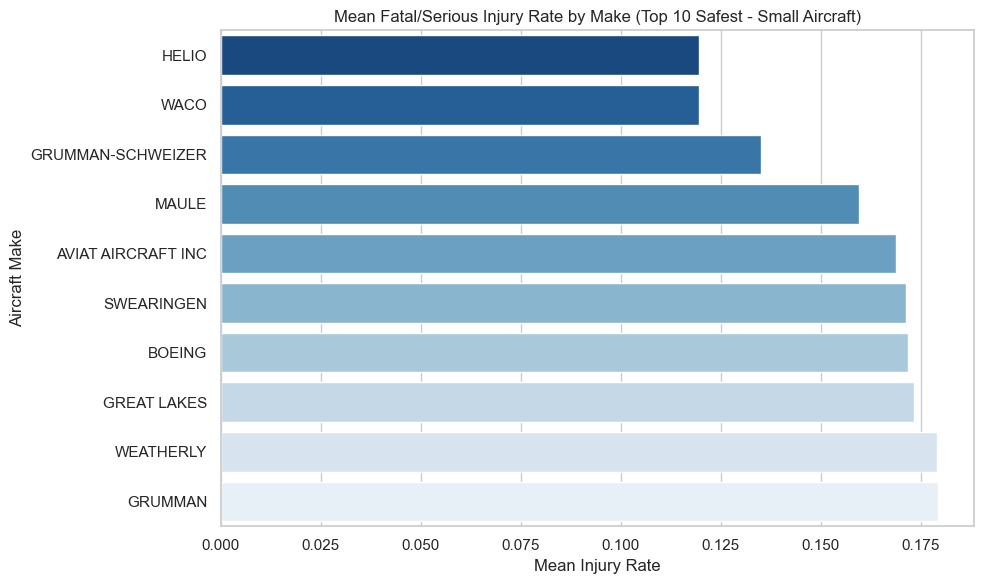

C:\Users\JoeJu\AppData\Local\Temp\ipykernel_27072\2641645187.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


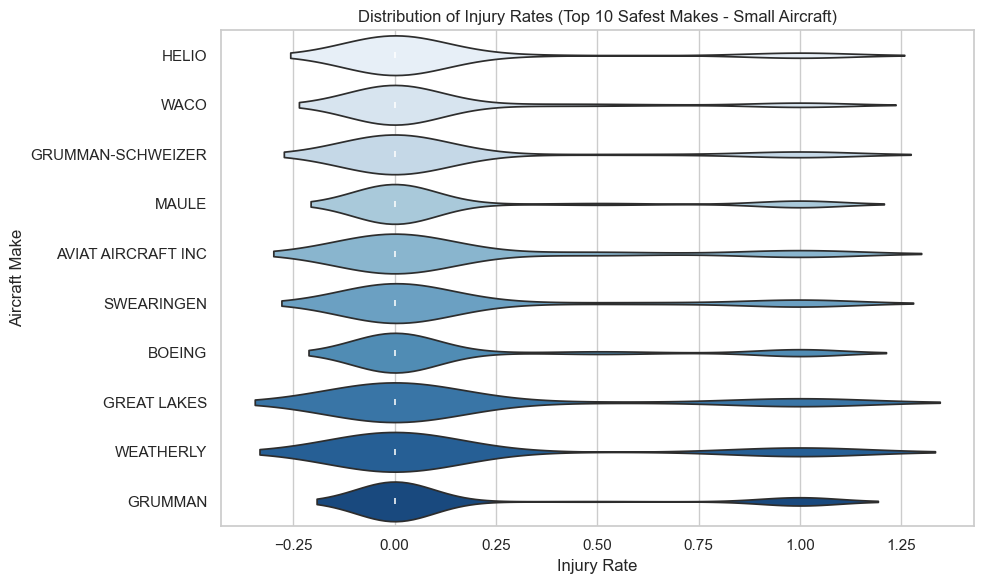

In [21]:
if 'Estimated.Total.Passengers' not in df.columns:
    df['Estimated.Total.Passengers'] = (
        df['Total.Fatal.Injuries'].fillna(0) +
        df['Total.Serious.Injuries'].fillna(0) +
        df['Total.Minor.Injuries'].fillna(0) +
        df['Total.Uninjured'].fillna(0)
    )

if 'Injury.Rate' not in df.columns:
    df['Injury.Rate'] = (
        (df['Total.Fatal.Injuries'].fillna(0) + df['Total.Serious.Injuries'].fillna(0)) /
        df['Estimated.Total.Passengers']
    ).fillna(0)

df_small = df[df['Estimated.Total.Passengers'] <= 20]

df_small_filtered = df_small.groupby("Make").filter(lambda x: len(x) >= 10)

top_10_safe_makes = (
    df_small_filtered.groupby("Make")["Injury.Rate"]
    .mean()
    .sort_values()
    .head(10)
    .index
)

df_top_10_small = df_small_filtered[df_small_filtered["Make"].isin(top_10_safe_makes)]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_10_small,
    x="Injury.Rate",
    y="Make",
    estimator="mean",
    ci=None,
    order=top_10_safe_makes,
    palette="Blues_r"
)
plt.title("Mean Fatal/Serious Injury Rate by Make (Top 10 Safest - Small Aircraft)")
plt.xlabel("Mean Injury Rate")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_top_10_small,
    x="Injury.Rate",
    y="Make",
    order=top_10_safe_makes,
    palette="Blues"
)
plt.title("Distribution of Injury Rates (Top 10 Safest Makes - Small Aircraft)")
plt.xlabel("Injury Rate")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()


### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
"The lowest injury rates for small aircrafts is Helio, followed by Waco and Grumman."
"For Large aircrafts, it's Aerospatiale, McDonnell Douglas, and Boeing"

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

Destruction Rate by Weather Condition:
   Weather.Condition  DestructionRate  Count
0               IMC         0.590364   4089
1               UNK         0.599653    577
2               VMC         0.174188  47334


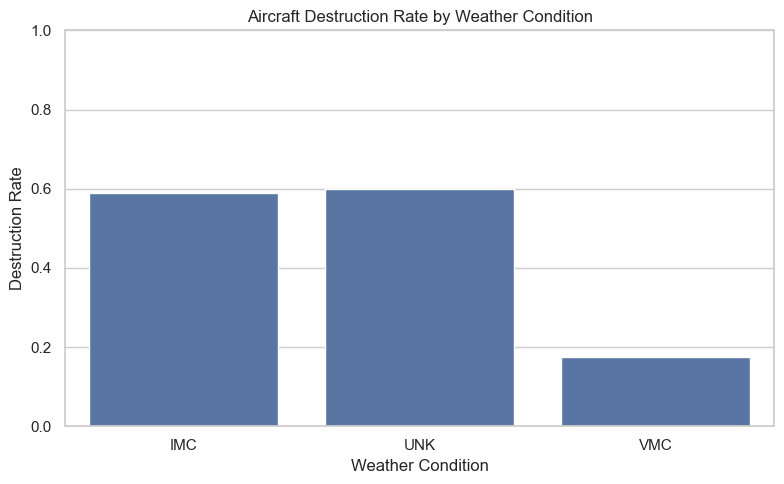

Destruction Rate by Phase of Flight:
    Broad.phase.of.flight  DestructionRate  Count
11               UNKNOWN         0.778443    334
6            MANEUVERING         0.450020   4922
1                  CLIMB         0.429370   1253
2                 CRUISE         0.365101   6516
7                  OTHER         0.355932     59
3                DESCENT         0.331826   1106
0               APPROACH         0.317142   3891
4              GO-AROUND         0.313305    932
9                TAKEOFF         0.233781   7661
8               STANDING         0.153684    475
5                LANDING         0.052054   9567
10                  TAXI         0.030782   1202


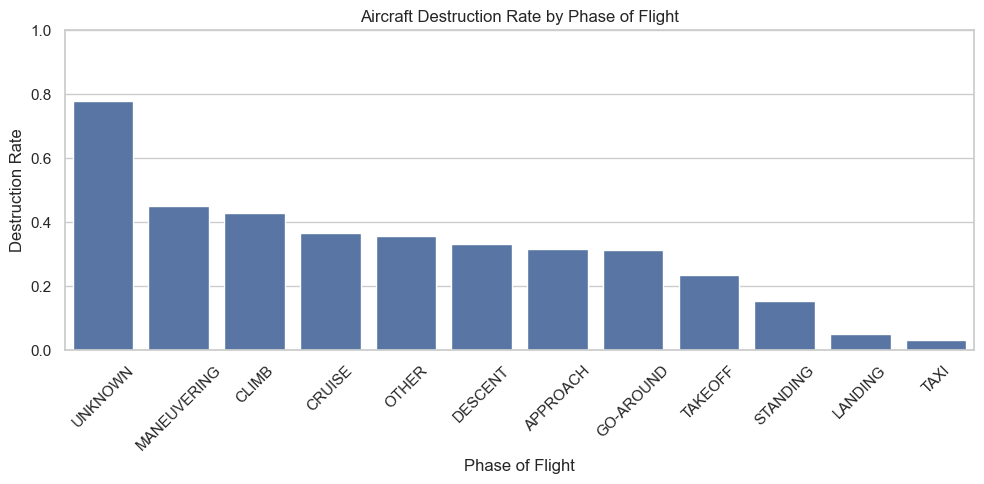

In [26]:
weather_summary = df.groupby('Weather.Condition').agg(
    DestructionRate=('Destroyed', 'mean'),
    Count=('Destroyed', 'count')
).reset_index()

# Display table
print("Destruction Rate by Weather Condition:\n", weather_summary)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_summary, x='Weather.Condition', y='DestructionRate')
plt.title('Aircraft Destruction Rate by Weather Condition')
plt.ylabel('Destruction Rate')
plt.xlabel('Weather Condition')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

phase_summary = df.groupby('Broad.phase.of.flight').agg(
    DestructionRate=('Destroyed', 'mean'),
    Count=('Destroyed', 'count')
).reset_index().sort_values(by='DestructionRate', ascending=False)

print("Destruction Rate by Phase of Flight:\n", phase_summary)

plt.figure(figsize=(10, 5))
sns.barplot(data=phase_summary, x='Broad.phase.of.flight', y='DestructionRate')
plt.title('Aircraft Destruction Rate by Phase of Flight')
plt.ylabel('Destruction Rate')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
"From the above graphs, you can see that the weather type effects the destruction rate. While VMC had the highest count, it also had the lowest destruction rate"
"Also, you can see that the aircraft destruction rate is highest when the aircraft is attempting to maneuver. Surprisngly, landing also has a lower destruction rate than one may hypothesize"

'Also, you can see that the aircraft destruction rate is highest when the aircraft is attempting to maneuver'